In [35]:
#http://www.trumptwitterarchive.com/archive

In [36]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
file_name = 'tweets'
df = pd.read_csv(file_name)

In [38]:
df.head()

,text,created_at
0,Was just briefed on Hurricane Delta and spoke ...,10-07-2020 19:43:08
1,Wow!!! NOW DO SOMETHING ABOUT THIS THE BIGGEST...,10-07-2020 18:04:47
2,https://t.co/CuRSrTGQ8V,10-07-2020 18:03:55
3,Early voting and vote-by-mail start TODAY in A...,10-07-2020 18:01:45
4,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,10-07-2020 15:25:38


In [39]:
df['dt'] = pd.to_datetime(df['created_at']).dt.date

In [40]:
def cap_ratio(txt):
    letters = 0
    capitals = 0
    for ch in txt:
        if ch.isalpha():
            letters += 1
            if ch.isupper():
                capitals += 1
    if letters == 0:
        letters += 1
    return capitals / letters

In [41]:
def remove_link(txt):
    if 'http' in txt:
        return txt[:txt.find('http')]
    else:
        return txt

In [42]:
def cut_at_280(txt):
    if len(txt) > 280:
        return txt[:280]
    else:
        return txt

In [43]:
df['text'] = df['text'].map(remove_link)
df['text'] = df['text'].map(cut_at_280)
df = df[~df['text'].str.contains('RT @')]
df = df[(df['dt'] != '') & (df['text'] != '')]
df = df[df['dt'] >= datetime.date(2014, 12, 1)]

In [44]:
df['caps'] = df['text'].map(cap_ratio)
df['length'] = df['text'].map(len)

In [45]:
df.sort_values(by=['dt'], inplace=True, ascending=True)

In [46]:
df2 = df[['dt', 'caps', 'length']].groupby('dt').mean()
df3 = df[['dt', 'text']].groupby('dt').count()

In [47]:
df2['caps_ma'] = df2['caps'].rolling(window=28).mean()
df2['length_ma'] = df2['length'].rolling(window=28).mean()
df3['count_ma'] = df3['text'].rolling(window=28).mean()

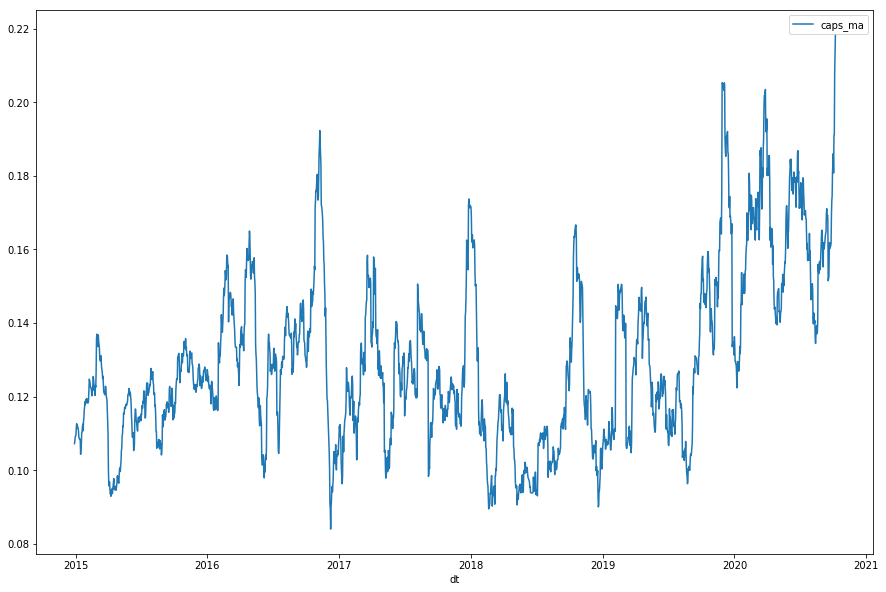

In [48]:
df2[['caps_ma']].plot.line(figsize=(15,10))

In [49]:
#df2[['length_ma']].plot.line(figsize=(15,10))

In [50]:
#df3['count_ma'].plot.line(figsize=(15,10))

In [51]:
df2[['caps_ma']].to_csv('caps.csv')
#df2[['length_ma']].to_csv('len.csv')
#df3[['count_ma']].to_csv('count.csv')